## Imorting Libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

## Loading the Dataset

In [3]:
df = pd.read_csv("Stock_dataset.csv")


## Data Analysis

In [4]:
df.head(30)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [7]:
df.size

16280

In [8]:
df.shape

(2035, 8)

In [9]:
df_open= df.reset_index()['Open']
print(df_open)

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64


## Data Visualization

Text(0.5, 1.0, 'Open')

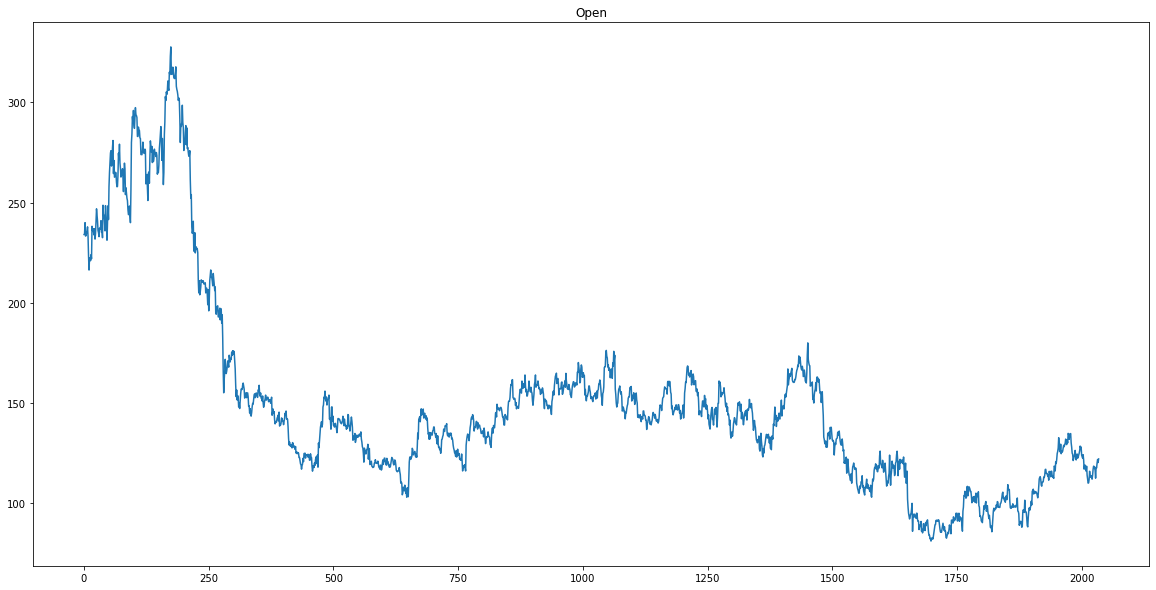

In [10]:
plt.subplots(figsize = (20,10))
plt.plot(df_open ,)
plt.title("Open")

## Preparing Data 

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler(feature_range = (0,1))
df_open = scaler.fit_transform(np.array(df_open).reshape(-1,1))
df_open.shape

(2035, 1)

In [13]:
print(df_open)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [14]:
training_size = int( len(df_open) * 0.75)
testing_size  = len(df_open) - training_size
train_data , test_data = df_open[0 : training_size, :], df_open[training_size : len(df_open), :1]
training_size , testing_size

(1526, 509)

In [15]:
train_data

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.18491484],
       [0.15774534],
       [0.16180049]])

In [16]:
test_data

array([[0.15774534],
       [0.15774534],
       [0.16991079],
       [0.13746959],
       [0.14963504],
       [0.16605839],
       [0.15369019],
       [0.14152474],
       [0.13341444],
       [0.13260341],
       [0.12368208],
       [0.12246553],
       [0.13625304],
       [0.11719384],
       [0.13746959],
       [0.15004055],
       [0.15308191],
       [0.15794809],
       [0.15186537],
       [0.14557989],
       [0.14497161],
       [0.14801298],
       [0.14476886],
       [0.11719384],
       [0.11151663],
       [0.10563666],
       [0.10218978],
       [0.09712084],
       [0.09691809],
       [0.11131387],
       [0.10644769],
       [0.11111111],
       [0.1202352 ],
       [0.11922141],
       [0.13219789],
       [0.10969181],
       [0.11232766],
       [0.10097324],
       [0.09712084],
       [0.09326845],
       [0.10948905],
       [0.10725872],
       [0.11719384],
       [0.12530414],
       [0.10705596],
       [0.11516626],
       [0.11111111],
       [0.106

## Splitting the Training and Testing set.

In [17]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return np.array(train_X), np.array(train_Y)

In [18]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [19]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

## Model Training

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 18s 363ms/step - loss: 0.0270 - val_loss: 0.0060
Epoch 2/100
23/23 [==============================] - 6s 265ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 6s 272ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 7s 291ms/step - loss: 0.0015 - val_loss: 8.3553e-04
Epoch 5/100
23/23 [==============================] - 7s 295ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/100
23/23 [==============================] - 7s 298ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 7s 298ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 7s 300ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/100
23/23 [==============================] - 7s 302ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/100
23/23 [==============================] - 7s 302ms/step - loss: 0.0011 - v

23/23 [==============================] - 7s 305ms/step - loss: 2.5280e-04 - val_loss: 1.8853e-04
Epoch 77/100
23/23 [==============================] - 7s 307ms/step - loss: 3.0871e-04 - val_loss: 2.2252e-04
Epoch 78/100
23/23 [==============================] - 7s 302ms/step - loss: 2.6210e-04 - val_loss: 2.0165e-04
Epoch 79/100
23/23 [==============================] - 7s 307ms/step - loss: 2.9818e-04 - val_loss: 3.2351e-04
Epoch 80/100
23/23 [==============================] - 7s 307ms/step - loss: 3.3947e-04 - val_loss: 2.2877e-04
Epoch 81/100
23/23 [==============================] - 7s 307ms/step - loss: 2.6860e-04 - val_loss: 2.6891e-04
Epoch 82/100
23/23 [==============================] - 7s 301ms/step - loss: 2.4657e-04 - val_loss: 2.0793e-04
Epoch 83/100
23/23 [==============================] - 7s 297ms/step - loss: 2.5289e-04 - val_loss: 2.5575e-04
Epoch 84/100
23/23 [==============================] - 7s 302ms/step - loss: 2.4291e-04 - val_loss: 2.4561e-04
Epoch 85/100
23/23 [===

## Model Prediction

In [24]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [25]:
train_predict

array([[0.84247386],
       [0.8290853 ],
       [0.81787384],
       ...,
       [0.19450271],
       [0.18593705],
       [0.18010873]], dtype=float32)

## Model Evaluation 

In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print('RMSE performance matrics : ',math.sqrt(mean_squared_error(y_train, train_predict)) )

RMSE performance matrics :  161.4057387746825


In [27]:
print("Test data RMSE : ",math.sqrt(mean_squared_error(y_test , test_predict)) )

Test data RMSE :  104.88012668931526


In [28]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict

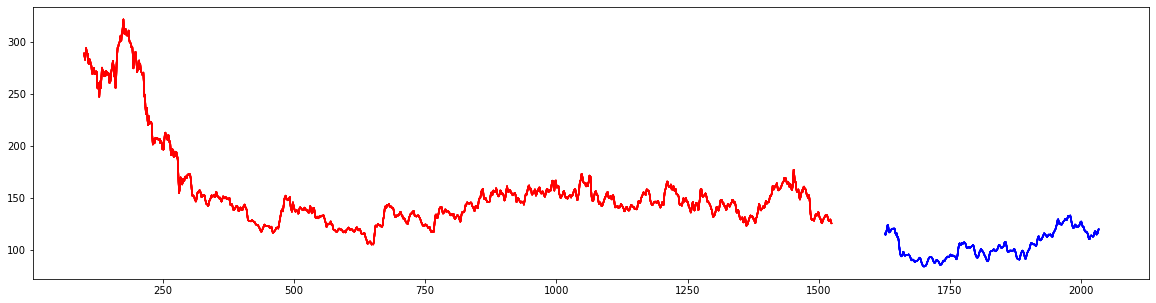

In [29]:
plt.subplots(figsize=(20,5))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='blue')
plt.show()

In [30]:
# for previous 100 days data
x_ip = test_data[409:].reshape(1,-1)
x_ip.shape

(1, 100)

In [31]:
temp_ip = list(x_ip)
temp_ip = temp_ip[0].tolist()

In [32]:
lst_output=[]
n_steps=100

future_Days= 15

i=0

while(i<future_Days):
    
    if(len(temp_ip)>100):
        x_ip = np.array(temp_ip[1:])
        print("Day {} input {}".format(i,x_ip))
        
        x_ip = x_ip.reshape(1,-1)
        x_ip = x_ip.reshape((1, n_steps, 1))
        yhat = model.predict(x_ip, verbose=0)
        print("Day {} output {}\n".format(i,yhat))
        
        temp_ip.extend(yhat[0].tolist())
        temp_ip = temp_ip[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_ip = x_ip.reshape((1, n_steps,1))
        yhat = model.predict(x_ip, verbose=0)
        print(yhat[0])
        temp_ip.extend(yhat[0].tolist())
        print(len(temp_ip))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.16059811]
101
Day 1 input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995

Day 8 output [[0.14304551]]

Day 9 input [0.1269262  0.15166261 0.15004055 0.14193025 0.16017843 0.15693431
 0.16504461 0.1770073  0.18146796 0.18815896 0.20924574 0.19424169
 0.18106245 0.18207624 0.1960665  0.17680454 0.18207624 0.18004866
 0.18207624 0.18876723 0.19383617 0.19099757 0.19505272 0.19809408
 0.20640714 0.19748581 0.19525547 0.20437956 0.19870235 0.21796431
 0.21553122 0.20600162 0.21654501 0.21654501 0.2175588  0.19870235
 0.19018654 0.17802109 0.175588   0.16301703 0.16707218 0.17112733
 0.17639903 0.18349554 0.1717356  0.16423358 0.16991079 0.17619627
 0.16788321 0.16909976 0.17396594 0.17741281 0.18268451 0.19221411
 0.18896999 0.19018654 0.17396594 0.17092457 0.16788321 0.17477697
 0.16443633 0.14557989 0.15287916 0.15369019 0.15044607 0.14152474
 0.15145985 0.13341444 0.12530414 0.11719384 0.11780211 0.12489862
 0.14132198 0.13098135 0.12935929 0.13240065 0.12895377 0.12530414
 0.13381995 0.14557989 0.15166261 0.15085158 0.14679643 0.14355231
 0.12733171 0.1496350

In [33]:
day_new = np.arange(1,101)
day_pred = np.arange(101,116)

In [34]:
fd = df_open.tolist()
fd.extend(lst_output)

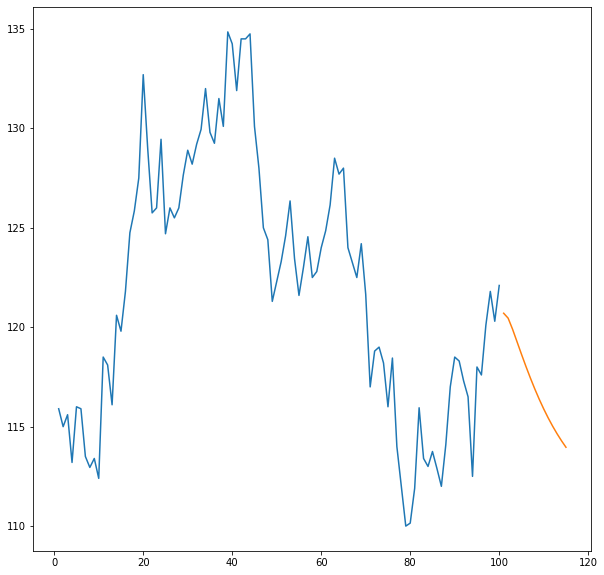

In [35]:
plt.subplots(figsize = (10,10))
plt.plot(day_new, scaler.inverse_transform(df_open[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))